# Sentiment Analysis

### Goal: Create a model to predict if movie reviews are positive or negative.
- This is a supervised learning problem as the dataset contains movie reviews that have been labeled negative or positive

- For more information on this dataset, visit http://ai.stanford.edu/~amaas/data/sentiment/

## Data preprocessing

In [1]:
# import dataset
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [4]:
#Check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
#check for missing values
df.isna().sum()

label      0
review    35
dtype: int64

- Remove empty reviews

In [6]:
df = df.dropna(axis=0)

- Remove reviews that are empty strings '' or ' '

In [7]:
#count reviews that are empty spaces
df['review'].str.isspace().sum()

27

In [8]:
#count reviews that are empty strings
df[df['review']==''].count()

label     0
review    0
dtype: int64

In [9]:
#Remove reviews that are empty spaces
df = df[df['review'].str.isspace()==False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [10]:
#Check is dataset is balanced
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

**Top 20 words per label type**

In [11]:
#20 most popular words in negative reviews
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer,CountVectorizer
cv = CountVectorizer(stop_words='english')
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for Negative reviews:\n',
      sorted(freqs, key=lambda x: x[1], reverse=True)[:20])

#20 most popular words in positive reviews
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
print('Top 20 words used for Positive reviews:\n',
      sorted(freqs, key=lambda x: x[1], reverse=True)[:20])

Top 20 words used for Negative reviews:
 [('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]
Top 20 words used for Positive reviews:
 [('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


## Modeling



In [12]:
#Create X and y df
X = df['review']
y = df['label']

In [13]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Training the model


In [14]:
#Create a pipeline to vectorize reviews and fit the model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

steps = [('tfidf',TfidfVectorizer(stop_words='english')),
         ('nb_model',MultinomialNB())]
pipe = Pipeline(steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('nb_model', MultinomialNB())])

### Results

In [15]:
#Create classification report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



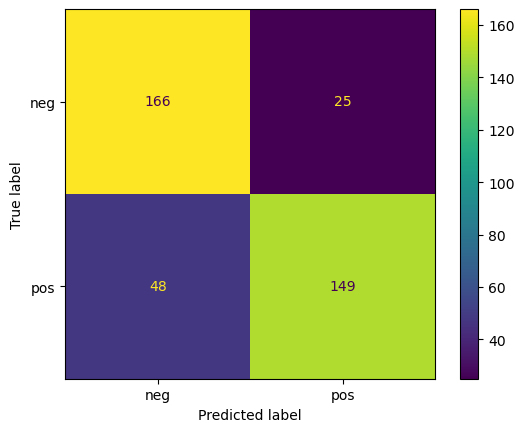

In [16]:
#Create Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Conclusion
- The model has 81% accuracy.
- Many words like 'Film', 'Movie', and 'Time' were common in positive and negative reviews.
- The model can be improved by hyperparameter tuning through Gridsearch
- The classification model used for this project is multinomial Naive Bayes.
- 65 reviews out of the 388 from the test data set were misclassified.